In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('../pruned.csv')

In [19]:
df.head()

,Brand,Total Score,CPU,GPU,Memory,UX,Type,Display Size,Pixels_X,Pixels_Y,...,LTE Cat*,Proximity sensor,Gyroscope,Compass,Barometer,Hall,effect sensor,Advanced cooling_Active fan,Advanced cooling_Vapor chamber,Advanced cooling_nan
0,0,726530,190308,208291,155891,172040,0,6.78,1080,2400,...,20,1,1,1,0,0,0,0,0,1
1,1,1152535,378836,371060,185462,217177,1,6.70,1344,2992,...,20,1,1,1,1,0,0,0,0,1
2,2,419572,135496,64653,110036,109387,2,6.58,1080,2408,...,13,1,0,1,0,0,0,0,0,1
3,2,785177,217516,233355,144938,199368,0,6.67,1080,2400,...,18,1,1,1,1,0,0,0,1,0
4,2,716770,209297,208395,135875,163203,0,6.67,1080,2340,...,22,1,1,1,1,1,1,0,0,1


In [20]:
correlation_matrix = df.corr()

In [21]:
correlation_matrix.to_csv('correlation_matrix.csv', header=True)

In [23]:
launch_price_corr = correlation_matrix['Launch price category'].sort_values(ascending=False)
print("Launch price category 與其他欄位的相關性：")
print(launch_price_corr)
launch_price_corr.to_csv('launch_price_corr.csv', header=True)


Launch price category 與其他欄位的相關性：
Launch price category       1.000000
Category                    0.752051
4K video recording          0.746974
Pixels_X                    0.704665
Wireless charging           0.683805
                              ...   
Display features           -0.430384
Advanced cooling_nan       -0.432807
Lithography process (nm)   -0.447650
FM radio                   -0.486435
Headphone audio jack       -0.515500
Name: Launch price category, Length: 72, dtype: float64


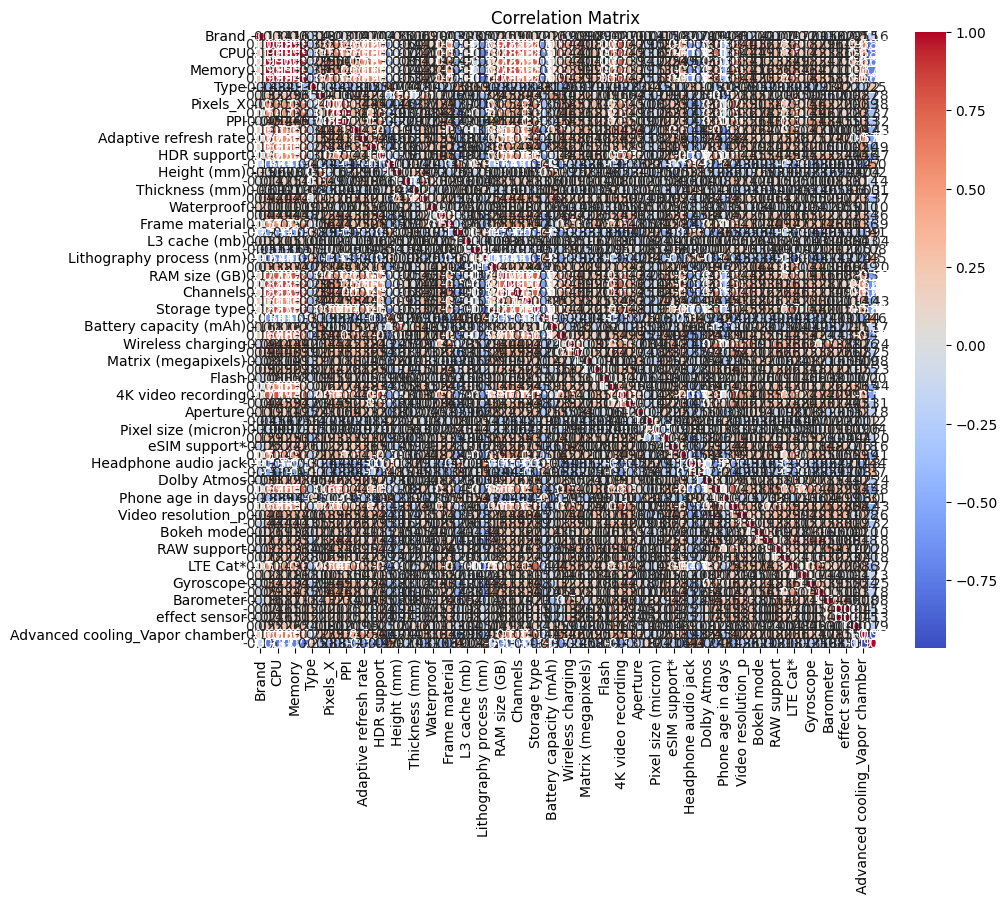

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.savefig('correlation_matrix.png')  # 存成圖片
plt.show()

In [25]:
high_corr_pairs = []

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.6:
            high_corr_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Column 1', 'Column 2', 'Correlation'])
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)
high_corr_df.to_csv('high_correlation_pairs.csv', index=False)

print("\n相關性大於 0.6 的欄位對：")
print(high_corr_df)



相關性大於 0.6 的欄位對：
                           Column 1                        Column 2  \
316                   effect sensor                            Hall   
315                            Hall                   effect sensor   
46                              GPU                     Total Score   
1                       Total Score                             GPU   
22                              CPU                     Total Score   
..                              ...                             ...   
310                        LTE Cat*        Lithography process (nm)   
225                    Storage type        Lithography process (nm)   
165        Lithography process (nm)                    Storage type   
324  Advanced cooling_Vapor chamber            Advanced cooling_nan   
333            Advanced cooling_nan  Advanced cooling_Vapor chamber   

     Correlation  
316     1.000000  
315     1.000000  
46      0.988150  
1       0.988150  
22      0.982404  
..           ...